In [1]:
# !unzip "/home/f4th3r/Desktop/Diagnosis_of_pneumonia/pnevmoniya.zip"

Archive:  /home/f4th3r/Desktop/Diagnosis_of_pneumonia/pnevmoniya.zip
  inflating: sample_solution.csv     
  inflating: test/test_img_10001.jpeg  
  inflating: test/test_img_10002.jpeg  
  inflating: test/test_img_10003.jpeg  
  inflating: test/test_img_10004.jpeg  
  inflating: test/test_img_10005.jpeg  
  inflating: test/test_img_10006.jpeg  
  inflating: test/test_img_10007.jpeg  
  inflating: test/test_img_10008.jpeg  
  inflating: test/test_img_10009.jpeg  
  inflating: test/test_img_10010.jpeg  
  inflating: test/test_img_10011.jpeg  
  inflating: test/test_img_10012.jpeg  
  inflating: test/test_img_10013.jpeg  
  inflating: test/test_img_10014.jpeg  
  inflating: test/test_img_10015.jpeg  
  inflating: test/test_img_10016.jpeg  
  inflating: test/test_img_10017.jpeg  
  inflating: test/test_img_10018.jpeg  
  inflating: test/test_img_10019.jpeg  
  inflating: test/test_img_10020.jpeg  
  inflating: test/test_img_10021.jpeg  
  inflating: test/test_img_10022.jpeg  
  inflating: 

In [1]:
from fastai.vision.all import  *

path =Path('/home/f4th3r/Desktop/Diagnosis_of_pneumonia/train')

#DataBlock
transports = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items= get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#DataLoader
dls = transports.dataloaders(path)

#dataset
# dls.train.show_batch(max_n=32,nrows=4)

#Train(Learning)
learn = vision_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.772460,0.252241,0.929445,04:15


epoch,train_loss,valid_loss,accuracy,time
0,0.201951,0.041853,0.987770,05:42
1,0.097290,0.041596,0.988711,05:43


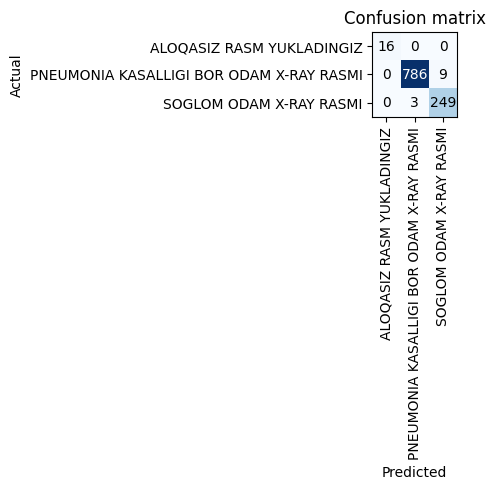

In [2]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [3]:
learn.export("pnev_model.pkl")